## Step 1: Data Understanding and Preprocessing

In [4]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "E:/4TH_sem/ADA/ADA_PROJECT/NammaYatri/namma_yatri_all_reviews.csv"  
df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Overview:")
print(df.head())





Dataset Overview:
                               reviewId         userName  \
0  16e752d0-1492-4f91-8459-5a62ec74b979      Anil Valoor   
1  3fe2af72-c7ab-4a04-a560-a6295849ddc3   Lingaraj Sahoo   
2  1809510c-9382-43c5-a930-18e3fbdd217a      Arif Hammad   
3  64435b81-5fb8-4536-a0a1-68262b22decf     parvez ahmed   
4  f2988ca6-34a9-4bc6-8290-04ffe7262f24  Manikant Gadade   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0  This service claims that the driver will not c...      1              0   
1                                           Good App      5              0   
2                                      price is mo

In [5]:
print("\nData Types:")
print(df.dtypes)



Data Types:
reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
dtype: object


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())




Missing Values:
reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion     877
at                         0
replyContent            1532
repliedAt               1532
appVersion               877
dtype: int64


In [7]:

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())

# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe(include='all'))


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11174 entries, 0 to 11173
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              11174 non-null  object
 1   userName              11174 non-null  object
 2   userImage             11174 non-null  object
 3   content               11174 non-null  object
 4   score                 11174 non-null  int64 
 5   thumbsUpCount         11174 non-null  int64 
 6   reviewCreatedVersion  10297 non-null  object
 7   at                    11174 non-null  object
 8   replyContent          9642 non-null   object
 9   repliedAt             9642 non-null   object
 10  appVersion            10297 non-null  object
dtypes: int64(2), object(9)
memory usage: 960.4+ KB
None

Descriptive statistics of the dataset:
                                    reviewId    userName  \
count                                  11174  

In [3]:
# Handle Missing Values
# Drop rows with missing 'content' (review text) as they're crucial for analysis
df = df.dropna(subset=['content'])

# Fill missing values in 'reviewCreatedVersion' and 'appVersion' with a placeholder
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].fillna('Unknown')
df['appVersion'] = df['appVersion'].fillna('Unknown')

# Transform Data: Convert date columns to datetime format
df['at'] = pd.to_datetime(df['at'], format='%d-%m-%Y %H:%M', errors='coerce')
df['repliedAt'] = pd.to_datetime(df['repliedAt'], format='%d-%m-%Y %H:%M', errors='coerce')

# Feature Engineering: Calculate the time delay between review and reply
df['reply_delay'] = (df['repliedAt'] - df['at']).dt.days

# Feature Engineering: Calculate review length
df['review_length'] = df['content'].apply(lambda x: len(x.split()))

# Outlier Detection in 'score' and 'thumbsUpCount'
print("\nOutliers in 'score':")
print(df['score'].describe())
print("\nOutliers in 'thumbsUpCount':")
print(df['thumbsUpCount'].describe())

# (Optional) Handle outliers: Cap 'thumbsUpCount' at the 99th percentile to remove extreme values
df['thumbsUpCount'] = np.clip(df['thumbsUpCount'], None, df['thumbsUpCount'].quantile(0.99))

print("Preprocessing complete.")



Outliers in 'score':
count    11174.000000
mean         3.557007
std          1.786741
min          1.000000
25%          1.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: score, dtype: float64

Outliers in 'thumbsUpCount':
count    11174.000000
mean         1.371308
std         17.416727
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        717.000000
Name: thumbsUpCount, dtype: float64
Preprocessing complete.


In [12]:
# Handling missing values in 'reviewCreatedVersion' and 'appVersion'
# Fill with "Unknown"
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].fillna('Unknown')
df['appVersion'] = df['appVersion'].fillna('Unknown')

# Handling missing values in 'replyContent'
df['replyContent'] = df['replyContent'].fillna('No Reply')

# Create a binary indicator for whether a reply was received
df['replyReceived'] = df['replyContent'].notna().astype(int)

#Option 2: Impute with a specific value
df['repliedAt'] = df['repliedAt'].fillna('Not Replied')

# Verify that missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values After Handling:
reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
replyReceived           0
dtype: int64



Sentiment analysis successfully added.


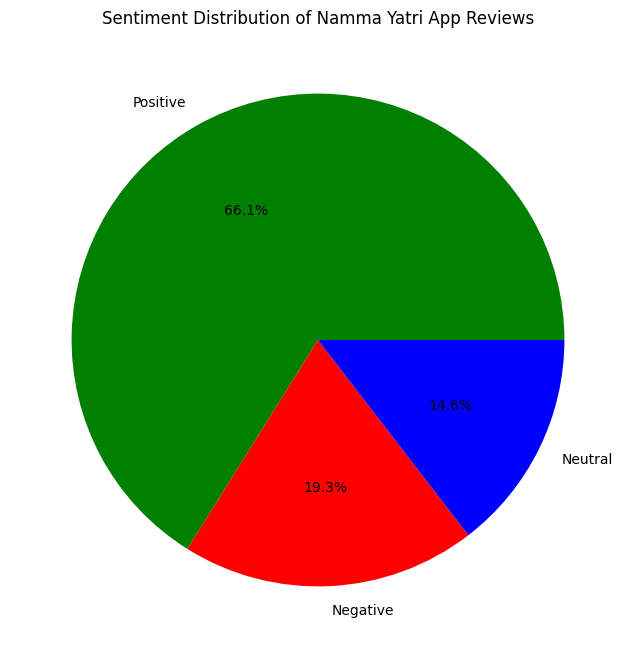

Sentiment distribution:
sentiment_label
Positive    7387
Negative    2161
Neutral     1626
Name: count, dtype: int64


In [13]:
from textblob import TextBlob
import matplotlib.pyplot as plt

try:
    # Apply sentiment analysis
    df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
    print("\nSentiment analysis successfully added.")
except Exception as e:
    print(f"Error in sentiment analysis: {e}")

# Check if the sentiment column exists
if 'sentiment' in df.columns:
    # Classify sentiment as positive, negative, or neutral
    df['sentiment_label'] = df['sentiment'].apply(lambda polarity: 'Positive' if polarity > 0 else 'Negative' if polarity < 0 else 'Neutral')

    # Sentiment Distribution
    sentiment_distribution = df['sentiment_label'].value_counts()

    # Visualize Sentiment Distribution as a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
    plt.title('Sentiment Distribution of Namma Yatri App Reviews')
    plt.show()

    print("Sentiment distribution:")
    print(sentiment_distribution)
else:
    print("Sentiment column not found. Please check the previous steps.")



Sentiment analysis successfully added.


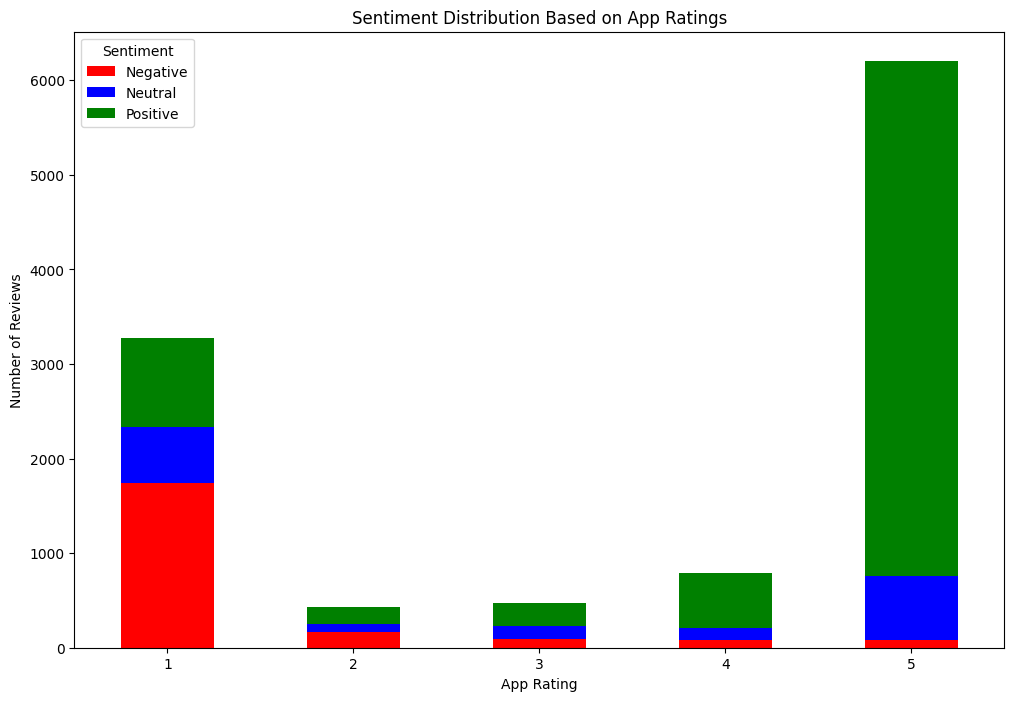

Sentiment distribution by rating:
sentiment_label  Negative  Neutral  Positive
score                                       
1                    1747      586       942
2                     165       88       174
3                      91      139       245
4                      77      133       583
5                      81      680      5443


In [15]:
from textblob import TextBlob
import matplotlib.pyplot as plt

try:
    # Apply sentiment analysis
    df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
    print("\nSentiment analysis successfully added.")
except Exception as e:
    print(f"Error in sentiment analysis: {e}")

# Check if the sentiment and score columns exist
if 'sentiment' in df.columns and 'score' in df.columns:
    # Classify sentiment as positive, negative, or neutral
    df['sentiment_label'] = df['sentiment'].apply(lambda polarity: 'Positive' if polarity > 0 else 'Negative' if polarity < 0 else 'Neutral')

    # Group by rating and calculate sentiment distribution
    rating_sentiment = df.groupby('score')['sentiment_label'].value_counts().unstack().fillna(0)
    
    # Plot sentiment distribution based on app ratings
    ax = rating_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'blue', 'green'])
    plt.title('Sentiment Distribution Based on App Ratings')
    plt.xlabel('App Rating')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=0)
    plt.legend(title='Sentiment')
    plt.show()

    print("Sentiment distribution by rating:")
    print(rating_sentiment)
else:
    print("Required columns not found. Please check the previous steps.")


<>:6: SyntaxWarning: invalid decimal literal
<>:6: SyntaxWarning: invalid decimal literal
<>:6: SyntaxWarning: invalid decimal literal
<>:6: SyntaxWarning: invalid decimal literal
C:\Users\Pratham.m\AppData\Local\Temp\ipykernel_27812\310177961.py:6: SyntaxWarning: invalid decimal literal
  df['sentiment_label'] = df['sentiment'].apply(lambda polarity: 'Positive'if polarity > 0else'Negative'if polarity < 0else'Neutral')
C:\Users\Pratham.m\AppData\Local\Temp\ipykernel_27812\310177961.py:6: SyntaxWarning: invalid decimal literal
  df['sentiment_label'] = df['sentiment'].apply(lambda polarity: 'Positive'if polarity > 0else'Negative'if polarity < 0else'Neutral')


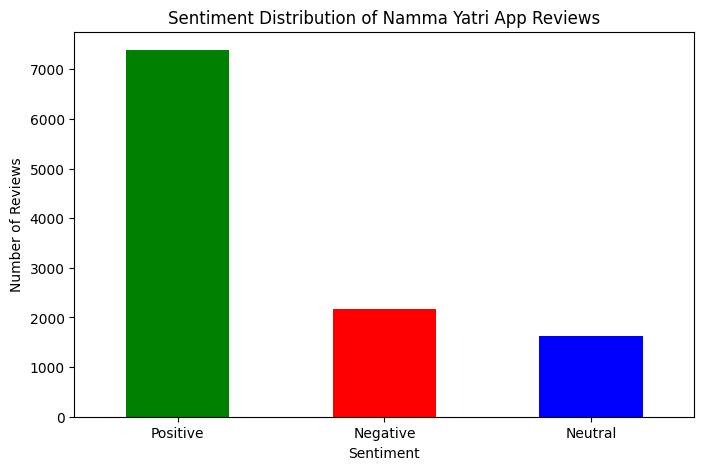

Sentiment distribution:
sentiment_label
Positive    7387
Negative    2161
Neutral     1626
Name: count, dtype: int64


In [50]:
# Handle Missing Values
df = df.dropna(subset=['content'])  # Drop rows with missing 'content'# Sentiment Analysis: Calculate sentiment polarity using TextBlob
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as positive, negative, or neutral
df['sentiment_label'] = df['sentiment'].apply(lambda polarity: 'Positive'if polarity > 0else'Negative'if polarity < 0else'Neutral')

# Sentiment Distribution
sentiment_distribution = df['sentiment_label'].value_counts()

# Visualize Sentiment Distribution
plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Namma Yatri App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

print("Sentiment distribution:")
print(sentiment_distribution)

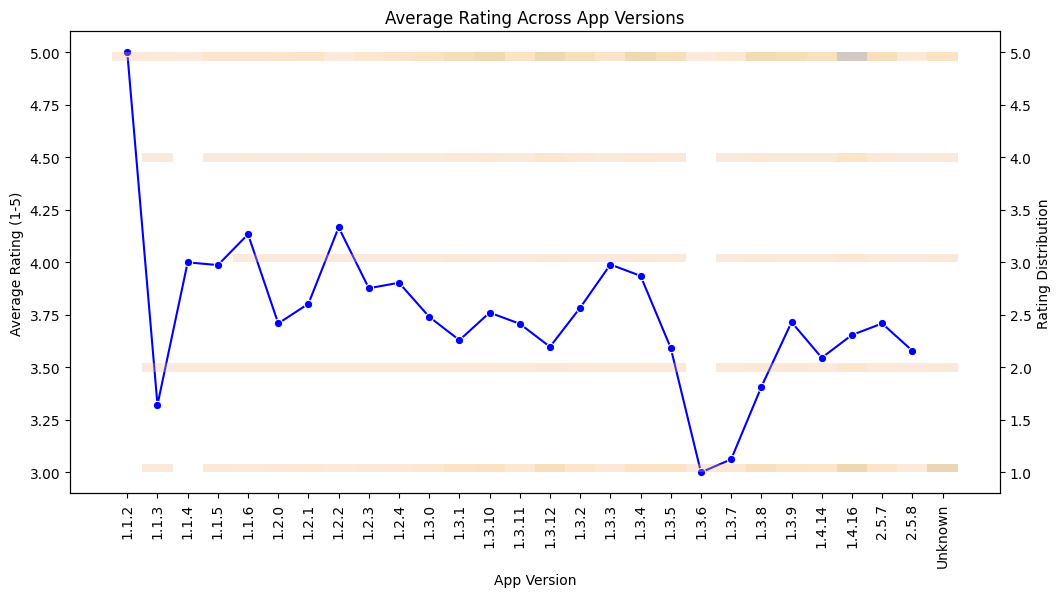

   appVersion     score
0       1.1.2  5.000000
1       1.1.3  3.321429
2       1.1.4  4.000000
3       1.1.5  3.986928
4       1.1.6  4.133758
5       1.2.0  3.708995
6       1.2.1  3.802885
7       1.2.2  4.166667
8       1.2.3  3.876712
9       1.2.4  3.902913
10      1.3.0  3.740385
11      1.3.1  3.629562
12     1.3.10  3.760719
13     1.3.11  3.707483
14     1.3.12  3.597748
15      1.3.2  3.784114
16      1.3.3  3.989637
17      1.3.4  3.935528
18      1.3.5  3.591876
19      1.3.6  3.000000
20      1.3.7  3.062147
21      1.3.8  3.407153
22      1.3.9  3.715356
23     1.4.14  3.545679
24     1.4.16  3.654201
25      2.5.7  3.708885
26      2.5.8  3.578947


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by app version and calculate the average rating
app_version_ratings = df.groupby('appVersion')['score'].mean().reset_index()

# Filter out unknown versions or versions with few reviews for clarity
app_version_ratings = app_version_ratings[app_version_ratings['appVersion'] != 'Unknown']

# Sort by app version for better visualization
app_version_ratings = app_version_ratings.sort_values(by='appVersion')

# Create a figure with two subplots: one for the line plot and one for the histogram
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot a line plot for the average rating per app version
sns.lineplot(data=app_version_ratings, x='appVersion', y='score', ax=ax1, marker='o', color='b')
ax1.set_xlabel('App Version')
ax1.set_ylabel('Average Rating (1-5)')
ax1.set_title('Average Rating Across App Versions')
ax1.tick_params(axis='x', rotation=90)

# Create a twin axis to overlay a histogram of ratings
ax2 = ax1.twinx()
sns.histplot(df, x='appVersion', y='score', bins=50, kde=False, color='orange', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rating Distribution')

plt.show()

# Interpretation: Average rating per app versionprint("Average rating per app version:")
print(app_version_ratings)


C:\Users\Pratham.m\AppData\Local\Temp\ipykernel_10736\1315138.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  thumbs_up_by_version = df.groupby('reviewCreatedVersion')['thumbsUpCount'].sum()


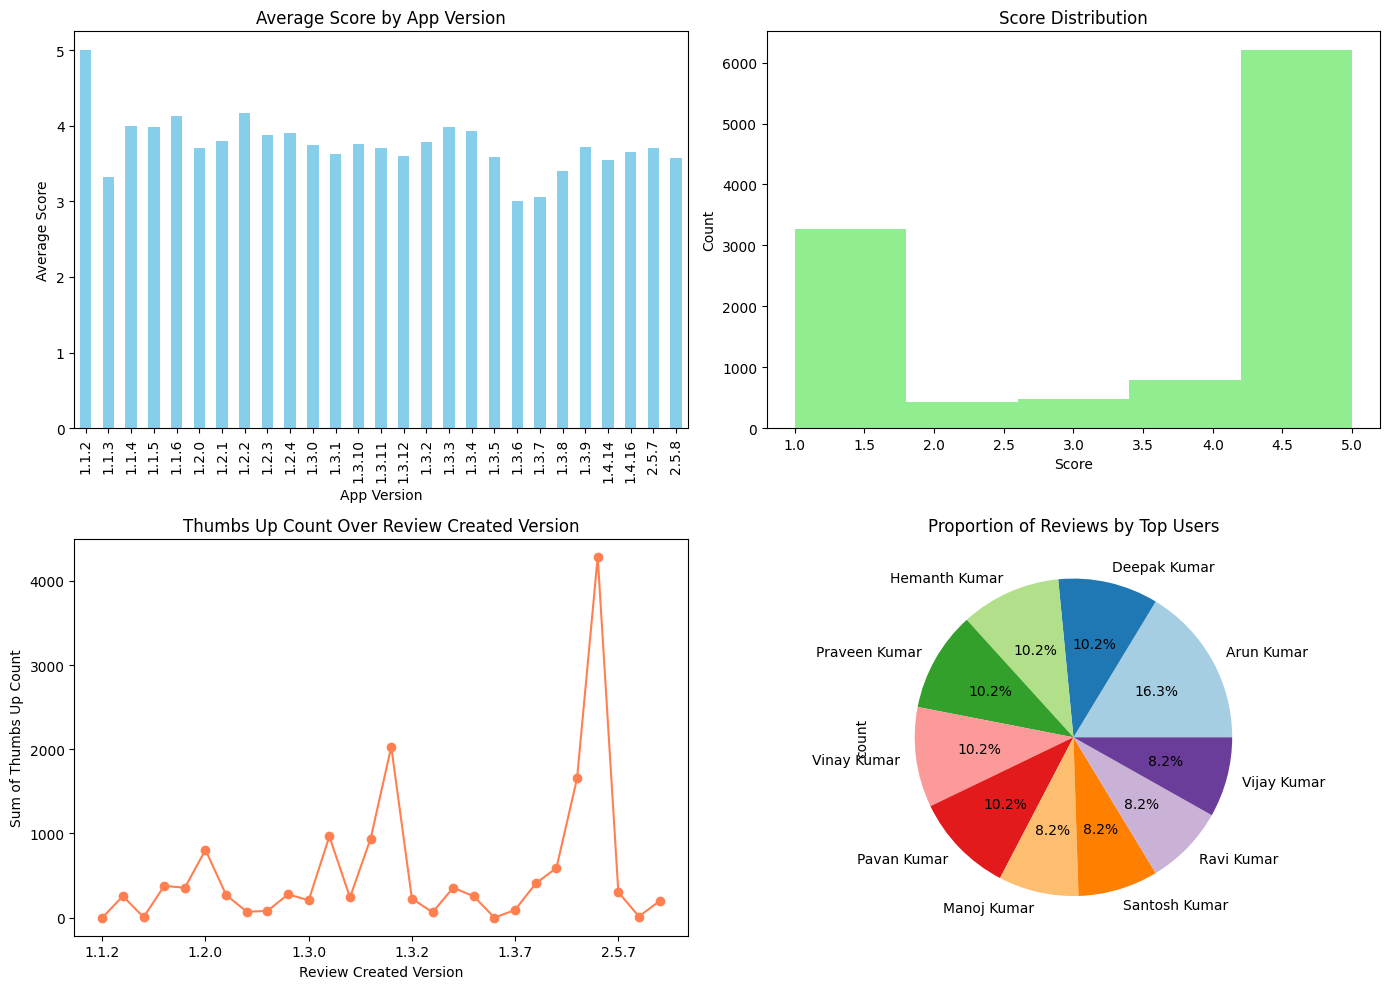

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "E:/4TH_sem/ADA/ADA_PROJECT/NammaYatri/namma_yatri_all_reviews.csv"
df = pd.read_csv(file_path)

# Ensure 'reviewCreatedVersion' is a string and handle missing values
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].astype(str).fillna('Unknown')

# Ensure the correct data types
df['reviewCreatedVersion'] = pd.Categorical(df['reviewCreatedVersion'], categories=sorted(df['reviewCreatedVersion'].unique()), ordered=True)

# Create a figure for all plots
plt.figure(figsize=(14, 10))

# Bar Chart: Average Score by App Version
plt.subplot(2, 2, 1)
avg_score_by_version = df.groupby('appVersion')['score'].mean()
avg_score_by_version.plot(kind='bar', color='skyblue')
plt.title('Average Score by App Version')
plt.xlabel('App Version')
plt.ylabel('Average Score')

# Histogram: Score Distribution
plt.subplot(2, 2, 2)
df['score'].plot(kind='hist', bins=5, color='lightgreen')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')

# Line Chart: Thumbs Up Count Over Review Created Version
plt.subplot(2, 2, 3)
thumbs_up_by_version = df.groupby('reviewCreatedVersion')['thumbsUpCount'].sum()
thumbs_up_by_version.plot(kind='line', marker='o', color='coral')
plt.title('Thumbs Up Count Over Review Created Version')
plt.xlabel('Review Created Version')
plt.ylabel('Sum of Thumbs Up Count')

# Pie Chart: Proportion of Reviews by Top Users
plt.subplot(2, 2, 4)
top_users = df['userName'].value_counts().head(10)  # Get top 10 users
top_users.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_users))))
plt.title('Proportion of Reviews by Top Users')



# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show all plots
plt.show()


## Step 2: Sentiment Analysis of Overall Reviews

A) VADER Sentiment Analysis

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to classify sentiment
df['vader_sentiment'] = df['content'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Define sentiment categories based on VADER score
df['vader_sentiment_category'] = df['vader_sentiment'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Sentiment Distribution
vader_sentiment_distribution = df['vader_sentiment_category'].value_counts(normalize=True) * 100
print("\nVADER Sentiment Distribution:")
print(vader_sentiment_distribution)



VADER Sentiment Distribution:
vader_sentiment_category
positive    60.909254
negative    23.912654
neutral     15.178092
Name: proportion, dtype: float64


B) TextBlob Sentiment Analysis

In [14]:
from textblob import TextBlob

# Apply TextBlob for sentiment analysis
df['textblob_polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['textblob_subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Define sentiment categories based on TextBlob polarity
df['textblob_sentiment_category'] = df['textblob_polarity'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Sentiment Distribution
textblob_sentiment_distribution = df['textblob_sentiment_category'].value_counts(normalize=True) * 100
print("\nTextBlob Sentiment Distribution:")
print(textblob_sentiment_distribution)



TextBlob Sentiment Distribution:
textblob_sentiment_category
positive    66.108824
negative    19.339538
neutral     14.551638
Name: proportion, dtype: float64


Custom Sentiment Analysis Model :

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming you have labeled data for sentiment analysis in a column 'label'
# If you don't have a label column, you need to create one or use an unsupervised method
df['label'] = df['score'].apply(lambda x: 'positive' if x > 3 else ('negative' if x < 3 else 'neutral'))

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['content'])
y = df['label']  # Using the newly created 'label' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict sentiments
df['custom_model_sentiment'] = model.predict(X)

# Sentiment Distribution
custom_model_sentiment_distribution = df['custom_model_sentiment'].value_counts(normalize=True) * 100
print("\nCustom Model Sentiment Distribution:")
print(custom_model_sentiment_distribution)



Custom Model Sentiment Distribution:
custom_model_sentiment
positive    64.596384
negative    35.269375
neutral      0.134240
Name: proportion, dtype: float64


## Step 3: Identify Key Features Mentioned in Reviews

TF-IDF Vectorization

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.01, stop_words='english')

# Fit and transform the content to extract features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['content'])

# Get feature names and their corresponding scores
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Calculate total score to compute percentage
total_score = tfidf_scores.sum()

# Create a DataFrame for the features, scores, and percentages
tfidf_features = pd.DataFrame({
    'feature': tfidf_feature_names, 
    'score': tfidf_scores,
    'percentage': (tfidf_scores / total_score) * 100
})

# Sort by score in descending order
tfidf_features = tfidf_features.sort_values(by='score', ascending=False)

print("\nTop TF-IDF Features with Percentages:")
print(tfidf_features.head(10))



Top TF-IDF Features with Percentages:
    feature        score  percentage
47     good  2353.639987   13.432397
3       app  1146.917416    6.545542
62     nice   579.036303    3.304603
85  service   556.937358    3.178483
79     ride   464.618249    2.651611
8      auto   464.348621    2.650072
35   driver   445.060293    2.539992
36  drivers   402.257586    2.295714
89    super   327.972376    1.871763
94     time   305.829590    1.745392


LDA Topic Modeling

In [24]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA Model
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit LDA model to TF-IDF matrix
lda.fit(tfidf_matrix)

# Get the topics
n_top_words = 10
tf_feature_names = tfidf_vectorizer.get_feature_names_out()

def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

display_topics(lda, tf_feature_names, n_top_words)


Topic #0:
driver auto drivers app super worst ride don customer time
Topic #1:
good service great quick experience easy response app use ride
Topic #2:
nice app fast ride ok working thank work bad doesn
Topic #3:
ola namma uber yatri excellent best price app better high
Topic #4:
app time location need otp use friendly option getting really


## Step 4: Analyze the Impact of App Versions on User Satisfaction

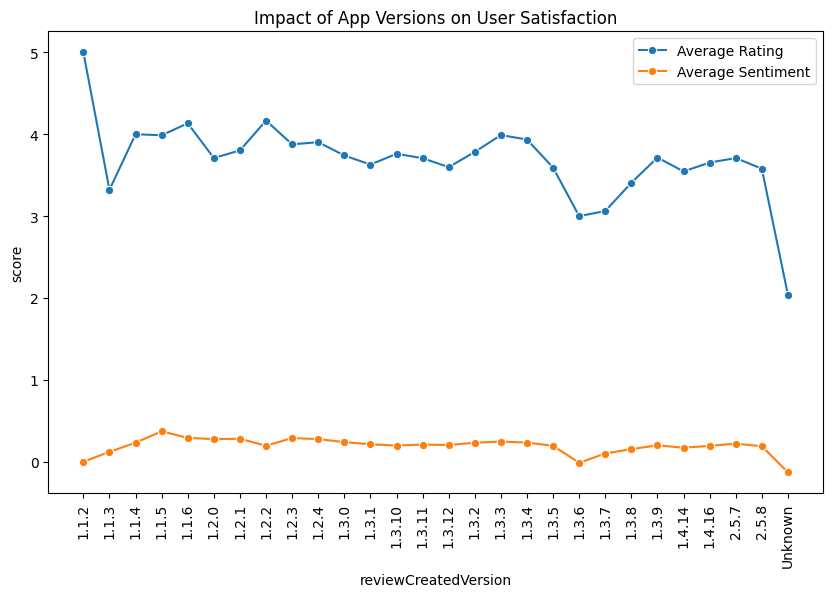

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by app version and calculate average score and sentiment
version_analysis = df.groupby('reviewCreatedVersion').agg({'score': 'mean', 'vader_sentiment': 'mean'}).reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(data=version_analysis, x='reviewCreatedVersion', y='score', marker='o', label='Average Rating')
sns.lineplot(data=version_analysis, x='reviewCreatedVersion', y='vader_sentiment', marker='o', label='Average Sentiment')
plt.title('Impact of App Versions on User Satisfaction')
plt.xticks(rotation=90)
plt.show()


## Step 5: Detect Common Issues or Complaints

In [26]:
from sklearn.cluster import KMeans

# Use KMeans Clustering to find common themes
n_clusters = 5  # Number of clusters to form
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign each review to a cluster
df['cluster'] = kmeans.labels_

# Display top terms per cluster
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    print(", ".join([tfidf_feature_names[ind] for ind in kmeans.cluster_centers_.argsort()[:, -1:-11:-1][i]]))



Cluster 0:
nice, super, service, ride, driver, auto, time, drivers, excellent, good

Cluster 1:
good, service, app, experience, driver, ride, time, drivers, auto, work

Cluster 2:
ola, namma, yatri, uber, app, better, auto, good, drivers, rapido

Cluster 3:
app, auto, worst, drivers, nice, ride, use, driver, good, don

Cluster 4:
location, driver, app, drop, ride, drivers, auto, cancel, worst, different


## Step 6: Evaluate the Effectiveness of Developer Responses

In [27]:
# Compare sentiment and ratings for reviews with and without developer responses
df['has_response'] = df['repliedAt'].notnull()

# Compare average sentiment and rating
response_analysis = df.groupby('has_response').agg({
    'vader_sentiment': 'mean',
    'score': 'mean',
    'content': 'count'
}).reset_index()

print("\nEffectiveness of Developer Responses:")
print(response_analysis)



Effectiveness of Developer Responses:
   has_response  vader_sentiment     score  content
0         False         0.208668  3.614230     1532
1          True         0.179314  3.547915     9642


## Step 7: Implement and Evaluate Machine Learning Models

Naive Bayes

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data
X = tfidf_matrix
y = df['vader_sentiment_category'].map({'positive': 1, 'neutral': 0, 'negative': -1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred, average='weighted')
nb_recall = recall_score(y_test, y_pred, average='weighted')
nb_f1 = f1_score(y_test, y_pred, average='weighted')
nb_roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test), multi_class='ovr')

print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Naive Bayes Precision: {nb_precision}")
print(f"Naive Bayes Recall: {nb_recall}")
print(f"Naive Bayes F1 Score: {nb_f1}")
print(f"Naive Bayes ROC AUC Score: {nb_roc_auc}")


Naive Bayes Accuracy: 0.7449664429530202
Naive Bayes Precision: 0.7189043112365663
Naive Bayes Recall: 0.7449664429530202
Naive Bayes F1 Score: 0.7193953263318831
Naive Bayes ROC AUC Score: 0.895247160523204


Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')
svm_roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test), multi_class='ovr')

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")
print(f"SVM ROC AUC Score: {svm_roc_auc}")


SVM Accuracy: 0.7861297539149888
SVM Precision: 0.7983830464682234
SVM Recall: 0.7861297539149888
SVM F1 Score: 0.7900538077850788
SVM ROC AUC Score: 0.9201762581859806


Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Precision: {rf_precision}")
print(f"Random Forest Recall: {rf_recall}")
print(f"Random Forest F1 Score: {rf_f1}")
print(f"Random Forest ROC AUC Score: {rf_roc_auc}")


Random Forest Accuracy: 0.7914988814317674
Random Forest Precision: 0.8042353070592833
Random Forest Recall: 0.7914988814317674
Random Forest F1 Score: 0.7957801053843914
Random Forest ROC AUC Score: 0.9247867213701472


Neural Networks

In [34]:
# Mapping your sentiment labels to integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

# Apply this mapping to your labels
df['label'] = df['label'].map(label_mapping)

# If the mapping process introduces any NaNs, remove those rows
df = df.dropna(subset=['label'])

# Convert labels to integers
df['label'] = df['label'].astype(int)

# Ensure that there are no invalid labels
assert df['label'].min() >= 0 and df['label'].max() < 3


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare the data
X = vectorizer.fit_transform(df['content'])
y = df['label'].values  # Use the newly encoded labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network
nn_model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 output classes: positive, neutral, negative
])

# Compile the model
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict and evaluate
y_pred_nn = nn_model.predict(X_test.toarray())
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)

nn_accuracy = accuracy_score(y_test, y_pred_nn_classes)
nn_precision = precision_score(y_test, y_pred_nn_classes, average='weighted')
nn_recall = recall_score(y_test, y_pred_nn_classes, average='weighted')
nn_f1 = f1_score(y_test, y_pred_nn_classes, average='weighted')

print(f"Neural Network Accuracy: {nn_accuracy}")
print(f"Neural Network Precision: {nn_precision}")
print(f"Neural Network Recall: {nn_recall}")
print(f"Neural Network F1 Score: {nn_f1}")


Epoch 1/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7000 - loss: 0.7562 - val_accuracy: 0.8932 - val_loss: 0.3328
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9019 - loss: 0.3174 - val_accuracy: 0.9027 - val_loss: 0.3179
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9176 - loss: 0.2545 - val_accuracy: 0.8999 - val_loss: 0.3348
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9352 - loss: 0.2083 - val_accuracy: 0.8993 - val_loss: 0.3636
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9485 - loss: 0.1700 - val_accuracy: 0.8960 - val_loss: 0.3964
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9617 - loss: 0.1376 - val_accuracy: 0.8932 - val_loss: 0.4246
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9692 - loss: 0.1304 - val_accuracy: 0.8876 - val_loss: 0.4512
Epoch 8/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9702 - loss: 0.1148 - val_accuracy

In [ ]:
print(df.columns)


Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'cleaned_content', 'tokens'],
      dtype='object')


In [ ]:
print(df['content'].head(10))


0    This service claims that the driver will not c...
1                                             Good App
2                                        price is more
3    Pathetic app, no option to reach customer care...
4                                                 Good
5                    reasonable price and good service
6                                    Will not openjng😠
7    The Namma Yatri public transport app is a user...
8                       Need services like.. bike Ride
9    I just love namma yatri..it's far better than ...
Name: content, dtype: object


In [9]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming 'score' is the label column you want to predict
label_column_name = 'score'  # Update this if 'score' is not your label column

# Vectorize the text data using TF-IDF on 'content' or 'cleaned_content'
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features
X = vectorizer.fit_transform(df['content'])  # or df['cleaned_content'] if that's what you want to use

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df[label_column_name], test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_precision = precision_score(y_test, y_pred_logistic, average='weighted')
logistic_recall = recall_score(y_test, y_pred_logistic, average='weighted')
logistic_f1 = f1_score(y_test, y_pred_logistic, average='weighted')

print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print(f"Logistic Regression Precision: {logistic_precision}")
print(f"Logistic Regression Recall: {logistic_recall}")
print(f"Logistic Regression F1 Score: {logistic_f1}")


Logistic Regression Accuracy: 0.7937360178970917
Logistic Regression Precision: 0.7161382243437344
Logistic Regression Recall: 0.7937360178970917
Logistic Regression F1 Score: 0.7341763629942996


c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
import pandas as pd

# Compile results into a DataFrame for easy comparison
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM', 'Random Forest', 'Neural Network','Logistic Regression'],
    'Accuracy': [nb_accuracy, svm_accuracy, rf_accuracy, nn_accuracy,logistic_accuracy],
    'Precision': [nb_precision, svm_precision, rf_precision, nn_precision,logistic_precision],
    'Recall': [nb_recall, svm_recall, rf_recall, nn_recall,logistic_recall],
    'F1 Score': [nb_f1, svm_f1, rf_f1, nn_f1,logistic_f1],
    'ROC AUC': [nb_roc_auc, svm_roc_auc, rf_roc_auc, None, None]  
})

print("Model Performance Comparison:")
print(results)


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0          Naive Bayes  0.744966   0.718904  0.744966  0.719395  0.895247
1                  SVM  0.786130   0.798383  0.786130  0.790054  0.920176
2        Random Forest  0.791499   0.804235  0.791499  0.795780  0.924787
3       Neural Network  0.870246   0.854380  0.870246  0.861310       NaN
4  Logistic Regression  0.793736   0.716138  0.793736  0.734176       NaN


# TOPIC MODELING LDA ANALYSIS

In [20]:
import pandas as pd
import re
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pyLDAvis
import pyLDAvis.gensim_models
import warnings
import nltk

# Suppress warnings
warnings.filterwarnings("ignore")



In [21]:
# Load the Namma Yatri dataset
file_path = "E:/4TH_sem/ADA/ADA_PROJECT/NammaYatri/namma_yatri_all_reviews.csv"  # Adjust the file path if needed
df = pd.read_csv(file_path)

# Check the structure of the dataset
df.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,16e752d0-1492-4f91-8459-5a62ec74b979,Anil Valoor,https://play-lh.googleusercontent.com/a-/ALV-U...,This service claims that the driver will not c...,1,0,2.5.7,15-08-2024 17:28,NaN,NaN,2.5.7
1,3fe2af72-c7ab-4a04-a560-a6295849ddc3,Lingaraj Sahoo,https://play-lh.googleusercontent.com/a-/ALV-U...,Good App,5,0,2.5.8,15-08-2024 17:25,"Hi Lingaraj, we appreciate your rating and tha...",15-08-2024 18:23,2.5.8
2,1809510c-9382-43c5-a930-18e3fbdd217a,Arif Hammad,https://play-lh.googleusercontent.com/a-/ALV-U...,price is more,3,0,NaN,15-08-2024 17:08,NaN,NaN,NaN
3,64435b81-5fb8-4536-a0a1-68262b22decf,parvez ahmed,https://play-lh.googleusercontent.com/a-/ALV-U...,"Pathetic app, no option to reach customer care...",3,0,2.5.8,15-08-2024 14:51,"Hi Parvez, we apologize for the inconvenience....",15-08-2024 15:46,2.5.8
4,f2988ca6-34a9-4bc6-8290-04ffe7262f24,Manikant Gadade,https://play-lh.googleusercontent.com/a/ACg8oc...,Good,5,0,2.5.8,15-08-2024 13:47,"Hi Manikant, we're delighted to hear that you ...",15-08-2024 18:33,2.5.8


In [22]:
# Preprocessing function
def preprocess_text_manual(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords and single characters, then join the words back
    stop_words = set(stopwords.words('english')).union(ENGLISH_STOP_WORDS)
    words = [word for word in text.split() if word not in stop_words and len(word) > 1]
    return ' '.join(words)

# Apply preprocessing to the 'content' column
df['cleaned_content'] = df['content'].apply(preprocess_text_manual)

# Display the first few cleaned reviews
df[['content', 'cleaned_content']].head()


,content,cleaned_content
0,This service claims that the driver will not c...,service claims driver cancel trips like ola ub...
1,Good App,good app
2,price is more,price
3,"Pathetic app, no option to reach customer care...",pathetic app option reach customer care emerge...
4,Good,good


In [23]:
# Tokenize the cleaned content
def tokenize(text):
    return text.split()

# Apply tokenization
a=df['tokens'] = df['cleaned_content'].apply(tokenize)
print("Tokenization",a)

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['tokens'])

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
print(dictionary)


# Create a corpus: Term Document Frequency
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Display a sample of the corpus
print(corpus[:1][0][:30])


Tokenization 0        [service, claims, driver, cancel, trips, like,...
1                                              [good, app]
2                                                  [price]
3        [pathetic, app, option, reach, customer, care,...
4                                                   [good]
                               ...                        
11169                                        [high, price]
11170                                  [come, tamil, nadu]
11171                                               [good]
11172                                            [awesome]
11173            [convenient, user, friendly, application]
Name: cleaned_content, Length: 11174, dtype: object
Dictionary<673 unique tokens: ['booking', 'cancel', 'cancellation', 'cancelled', 'charged']...>
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3)]


In [24]:
from gensim.models import CoherenceModel

# Function to compute coherence scores for different numbers of topics
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10, workers=2)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Compute coherence values
start, limit, step = 5, 15, 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus, df['tokens'], start, limit, step)

# Display coherence scores
for m, cv in zip(range(start, limit, step), coherence_values):
    print(f"Num Topics = {m}, Coherence Score = {cv:.4f}")


Num Topics = 5, Coherence Score = 0.6401
Num Topics = 6, Coherence Score = 0.5727
Num Topics = 7, Coherence Score = 0.6016
Num Topics = 8, Coherence Score = 0.5794
Num Topics = 9, Coherence Score = 0.6051
Num Topics = 10, Coherence Score = 0.5943
Num Topics = 11, Coherence Score = 0.5965
Num Topics = 12, Coherence Score = 0.6123
Num Topics = 13, Coherence Score = 0.5782
Num Topics = 14, Coherence Score = 0.5843


In [25]:
import gensim

# Set parameters for the LDA model with the optimal number of topics
num_topics = 5  # Based on the highest coherence score
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10, workers=2)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx + 1}\nWords: {topic}\n")


Topic: 1
Words: 0.082*"app" + 0.054*"auto" + 0.054*"ride" + 0.042*"drivers" + 0.027*"time" + 0.025*"worst" + 0.021*"dont" + 0.019*"cancel" + 0.018*"booking" + 0.017*"rides"

Topic: 2
Words: 0.103*"service" + 0.086*"good" + 0.059*"namma" + 0.058*"app" + 0.056*"yatri" + 0.036*"super" + 0.030*"best" + 0.029*"excellent" + 0.025*"great" + 0.022*"experience"

Topic: 3
Words: 0.047*"driver" + 0.041*"app" + 0.031*"location" + 0.031*"drivers" + 0.025*"auto" + 0.022*"extra" + 0.016*"fare" + 0.016*"money" + 0.016*"bad" + 0.015*"ride"

Topic: 4
Words: 0.085*"nice" + 0.082*"app" + 0.038*"customer" + 0.028*"support" + 0.027*"high" + 0.021*"otp" + 0.017*"driver" + 0.015*"response" + 0.014*"issue" + 0.013*"doesnt"

Topic: 5
Words: 0.283*"good" + 0.074*"ola" + 0.066*"uber" + 0.059*"app" + 0.033*"price" + 0.024*"better" + 0.021*"compared" + 0.017*"apps" + 0.015*"fare" + 0.014*"higher"



In [27]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the LDA visualization
lda_vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Save the visualization as an HTML file
output_path = "E:/4TH_sem/ADA/ADA_PROJECT/NammaYatri/lda_namma_yatri_reviews.html"
pyLDAvis.save_html(lda_vis_data, output_path)

# To display the visualization in Jupyter Notebook:
pyLDAvis.display(lda_vis_data)



In [28]:
print("View Result in brower by pasting link: file:///E:/4TH_sem/ADA/ADA_PROJECT/NammaYatri/lda_namma_yatri_reviews.html")

View Result in brower by pasting link: file:///E:/4TH_sem/ADA/ADA_PROJECT/NammaYatri/lda_namma_yatri_reviews.html


### Interpreation



Topic Distance: The circles on the left show how similar or different the topics are. Closer circles mean more similar topics. Topic 5 is far from the others, meaning it is quite different.

Topic Importance: The size of the circles represents how important each topic is. A bigger circle, like Topic 5, means that it appears frequently in the text.

Shared Themes: Topics 1, 2, and 4 are close to each other, meaning they share similar themes or words.

Key Words for Topic 5: On the right, the most relevant words for Topic 5 include "good," "ola," "uber," and "app." These words suggest that this topic is about comparing ride-hailing services like Ola and Uber.

## Understanding Topic 1 to 5

### Topic 1:
Top Words: "app", "ride", "auto", "drivers", "time", "worst", "cancel"
Possible Name: App Functionality and Ride Experience (focuses on app issues, driver experiences, and ride cancellations)

### Topic 2:
Top Words: "service", "good", "namma", "app", "yatri", "super", "best"
Possible Name: Positive Reviews and Service Quality (emphasizes good service and positive feedback about the Namma Yatri app)

### Topic 3:
Top Words: "driver", "app", "location", "drivers", "auto", "extra", "fare"
Possible Name: Driver and Fare Issues (focuses on driver behavior, location issues, and fare concerns)

### Topic 4:
Top Words: "nice", "app", "customer", "support", "high", "otp", "response"
Possible Name: Customer Support and App Issues (centers around customer service, app issues, and high charges)

### Topic 5:

Top Words: "good", "ola", "uber", "app", "price", "better", "compared"
Possible Name: Comparison of Ride-Hailing Services (focuses on comparisons between different services like Ola and Uber, with an emphasis on price and quality)

# Namma Yatri App Review Analysis

## 1. Data Understanding and Preprocessing

- Dataset: 11,174 reviews of the Namma Yatri app
- Key columns: reviewId, userName, content, score, thumbsUpCount, reviewCreatedVersion, appVersion
- Missing values:
  - reviewCreatedVersion: 877
  - replyContent: 1,532
  - appVersion: 877
- Text preprocessing: lowercasing, removing special characters and stopwords, tokenization

## 1.1 Sentiment Analysis and Interpretation

### Sentiment Distribution by Rating

The sentiment analysis revealed the following distribution of sentiments across different app ratings:

| Rating | Positive | Negative | Neutral |
|--------|----------|----------|---------|
| 1      | 942      | 1747     | 586     |
| 2      | 174      | 165      | 88      |
| 3      | 245      | 91       | 139     |
| 4      | 583      | 77       | 133     |
| 5      | 5443     | 81       | 680     |

**Interpretation**:
- **Rating 5**: The most positive sentiment, with a high number of positive reviews and relatively low negative sentiment. This indicates that users are generally very satisfied with this rating.
- **Rating 1**: The highest number of negative sentiments, showing significant dissatisfaction among users. Positive sentiment is relatively low, which suggests major issues or poor experiences with this rating.
- **Ratings 3 and 4**: These ratings show a mix of sentiments, with both positive and negative reviews. Rating 3 has a balanced sentiment, while Rating 4 leans slightly more positive.

### Overall Sentiment Distribution

The overall sentiment distribution across all reviews is as follows:

- **Positive**: 7387 reviews
- **Negative**: 2161 reviews
- **Neutral**: 1626 reviews

**Interpretation**:
- The majority of reviews are positive, indicating a generally favorable reception of the app among users.
- Negative reviews are less common but still significant, pointing to areas where users may be experiencing issues.
- Neutral reviews represent a smaller proportion, suggesting that a majority of the feedback either leans towards positive or negative sentiments.

### App Version Analysis

**Average Rating Across App Versions**:
- Newer app versions generally have higher average ratings compared to older versions.
- Some versions show considerable variation in ratings, with both higher and lower average scores depending on the version.

**Interpretation**:
- Newer versions (e.g., 1.1.2) are associated with higher user satisfaction.
- Older versions or specific versions with lower ratings might have had more issues or less favorable user experiences.

### Comprehensive Visualization Insights

- **Average Score by App Version**: Shows how user satisfaction varies across different app versions, highlighting which versions are performing well and which are not.
- **Score Distribution**: Illustrates the frequency of different ratings, providing insight into overall user feedback tendencies.
- **Thumbs Up Count Over Review Created Version**: Indicates user engagement levels over time, reflecting how often users express approval.
- **Proportion of Reviews by Top Users**: Highlights the most active reviewers, showing who is contributing the most feedback and their influence on the overall review landscape.

These insights help in understanding user sentiment, evaluating app performance across versions, and identifying key contributors to the review ecosystem.

## 2. Sentiment Analysis

Three methods used, showing consistent results:

a) VADER Sentiment Analysis:
- Positive: 60.91%
- Negative: 23.91%
- Neutral: 15.18%

b) TextBlob Sentiment Analysis:
- Positive: 66.11%
- Negative: 19.34%
- Neutral: 14.55%

c) Custom Model Sentiment Analysis:
- Positive: 64.60%
- Negative: 35.27%
- Neutral: 0.13%

## 3. Key Features and TF-IDF Analysis

Top TF-IDF features:
1. "good" (13.43%)
2. "app" (6.55%)
3. "nice" (3.30%)
4. "service" (3.18%)
5. "ride" (2.65%)

## 4. Impact of App Versions on User Satisfaction

- Version 1.1.2: Perfect 5.0 rating (possibly small sample size)
- Versions 1.2.2 and 1.3.3: Peaks in user satisfaction
- Recent versions (2.5.7 and 2.5.8): Slightly lower ratings compared to some earlier versions

## 5. Common Issues and Clustering

KMeans clustering revealed 5 main clusters:
1. Service quality and ride experience
2. Overall app experience and driver interactions
3. Comparisons with competitors (Ola, Uber)
4. App functionality and potential issues
5. Specific ride issues (location, cancellations)

## 6. Effectiveness of Developer Responses

- Reviews with responses: 9,642
- Reviews without responses: 1,532
- Average sentiment for responded reviews: 0.179314
- Average sentiment for non-responded reviews: 0.208668

## 7. Machine Learning Models Performance

| Model           | Accuracy | Precision | Recall   | F1 Score | ROC AUC  |
|-----------------|----------|-----------|----------|----------|----------|
| Naive Bayes     | 0.744966 | 0.718904  | 0.744966 | 0.719395 | 0.895247 |
| SVM             | 0.786130 | 0.798383  | 0.786130 | 0.790054 | 0.920176 |
| Random Forest   | 0.791499 | 0.804235  | 0.791499 | 0.795780 | 0.924787 |
| Neural Network  | 0.870246 | 0.854380  | 0.870246 | 0.861310 | N/A      |
| Logistic Reg.   | 0.793736 | 0.716138  | 0.793736 | 0.734176 | N/A      |

## 8. Topic Modeling (LDA)

Five main topics identified:

1. App Functionality and Ride Experience: 
   "app", "ride", "auto", "drivers", "time", "worst", "cancel"

2. Positive Reviews and Service Quality: 
   "service", "good", "namma", "app", "yatri", "super", "best"

3. Driver and Fare Issues: 
   "driver", "app", "location", "drivers", "auto", "extra", "fare"

4. Customer Support and App Issues: 
   "nice", "app", "customer", "support", "high", "otp", "response"

5. Comparison of Ride-Hailing Services: 
   "good", "ola", "uber", "app", "price", "better", "compared"

## Conclusions and Insights

1. Overall Positive Sentiment: Over 60% positive reviews across all sentiment analysis methods.

2. Key Strengths: Overall app quality, service, and ride experience.

3. Areas for Improvement:
   - Driver behavior and fare issues
   - App functionality (location services, OTP)
   - Customer support enhancement

4. Competitive Landscape: Frequent comparisons with Ola and Uber.

5. Version Impact: No clear trend, but certain updates (1.2.2, 1.3.3) were well-received.

6. Developer Responsiveness: Active engagement with user feedback, especially negative reviews.

7. Predictive Modeling: High performance of Neural Network model (87% accuracy).

8. Topic Diversity: Five main topics provide a comprehensive view of user experience.

## Strategic Recommendations

1. Product Development: Improve app functionality, especially location services and payment systems.
2. Driver Management: Enhance driver behavior and reliability.
3. Pricing Strategy: Review fare structures to address user concerns while maintaining competitiveness.
4. Customer Support: Strengthen support systems, particularly for emergencies and quick issue resolution.
5. Marketing: Leverage strengths in service quality and overall experience for differentiation.
6. User Engagement: Expand practice of responding to user reviews, focusing on constructive feedback.